In [2]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from collections import Counter
import spacy

nlp = spacy.load('en_core_web_lg')

In [3]:
file = pd.read_csv('winemag-data-130k-v2.csv')
file

## extract the most pop country

country = Counter(file['country'])
pop_country=[]
for key,val in country.most_common(10):
    pop_country.append(key)

df = file[file['country'].isin(pop_country)]
Counter(df['country']), df['country'].size


(Counter({'Italy': 19540,
          'Portugal': 5691,
          'US': 54504,
          'Spain': 6645,
          'France': 22093,
          'Germany': 2165,
          'Argentina': 3800,
          'Chile': 4472,
          'Australia': 2329,
          'Austria': 3345}),
 124584)

In [11]:
df['description'][0]

"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity."

In [13]:
des['desc'][0]

'aroma tropical fruit broom brimstone herb palate overly expressive unripened apple citrus sage alongside brisk acidity'

In [4]:
# Importing libraries 
import nltk 
import re 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import numpy as np
import pandas as pd

des = np.load('df_desc.npy',allow_pickle=True)

des = pd.DataFrame(des)
des.columns=['desc']
des['country']= np.array(df['country'])
Counter(des['country'])


Counter({'Italy': 19540,
         'Portugal': 5691,
         'US': 54504,
         'Spain': 6645,
         'France': 22093,
         'Germany': 2165,
         'Argentina': 3800,
         'Chile': 4472,
         'Australia': 2329,
         'Austria': 3345})

In [5]:
germany2 = df[df['country']=='Germany']

In [6]:
italy = des[des['country']=='Italy']
germany = des[des['country']=='Germany']
germany

,desc,country
8,savory thyme note sunny flavor peach brisk dry...,Germany
15,zesty orange peel apple note sprightly mineral...,Germany
76,earthy pollen mineral note savory tone medium ...,Germany
85,pronounced dust pollen earth tone savoriness w...,Germany
144,crisp pristine peach apricot note nose palate ...,Germany
...,...,...
124538,despite plenty honeyed sweetness wine slate mi...,Germany
124543,thick oily sweet wine clearly typical spätlese...,Germany
124544,honeyed orange section aroma wine mind mouth p...,Germany
124565,plump clingy peach honey note streak lime deli...,Germany


### stop-words for pre-processing

In [5]:
### sample description
from sklearn.feature_extraction import text 

## remove stop words
stopwords = ["wine","rich","character",'pinor','noir',"flavor", "riesling","flavors","Cabernet Sauvignon","palate","aroma","hints","finish",'nose','note','ripe','Cabernet','cabernet','malbec',"Sauvignon",'mouth','year']
stop_words = text.ENGLISH_STOP_WORDS.union(stopwords)


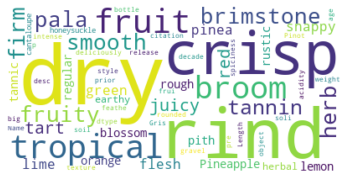

In [24]:
stopwords = set(STOPWORDS)
stopwords.update(["wine","rich","character","flavor", "flavors","palate","aroma","hints","finish",'nose','note','ripe','Cabernet','Sauvignon','mouth','year'])


wordcloud = WordCloud( stopwords=stopwords,background_color="white").generate(str(des['desc']))

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file('wordcloud.jpg')

## 2-grams anaysis for each country

In [17]:
def count_score(country_des):
    vectorizer = CountVectorizer(ngram_range =(2, 2),stop_words=stop_words) 
    X1 = vectorizer.fit_transform(country_des)  
    features = (vectorizer.get_feature_names()) 

    X2 = vectorizer.fit_transform(country_des) 

    # Getting top tfidf ranking
    sums = X2.sum(axis = 0) 
    df = [] 
    for col, grams in enumerate(features): 
        df.append( (grams, sums[0, col] )) 
    ranking = pd.DataFrame(df, columns = ['words', 'tf-idf']) 
    words = (ranking.sort_values('tf-idf', ascending = False)) 
    return(words)http://localhost:8888/notebooks/Desktop/textmining/NB%2BSVM%2BMLP.ipynb#Get-the-Wordcloud-for-each-country
    

#### Get the Wordcloud for each country

In [19]:
des['desc']

0         aroma tropical fruit broom brimstone herb pala...
1         ripe fruity wine smooth firm tannin juicy red ...
2         tart snappy flavor lime flesh rind green pinea...
3         Pineapple rind lemon pith orange blossom aroma...
4         like regular rough tannic rustic earthy herbal...
                                ...                        
124579    note honeysuckle cantaloupe deliciously feathe...
124580    citation decade bottle age prior release pre p...
124581    gravel soil wine crisp dry character ripe frui...
124582    dry style Pinot Gris crisp acidity weight soli...
124583    big rich dry intense spiciness rounded texture...
Name: desc, Length: 124584, dtype: object

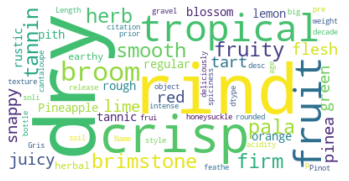

In [62]:
def create_cloud(tfidf_score):

    words = tfidf_score

    word_dict = dict(zip(words.words, words['tf-idf']))
    
    wordcloud = WordCloud(background_color="white").generate_from_frequencies(word_dict)
    plt.figure(figsize=(3,2))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(str(country)+ ' wine')
    plt.axis("off")
    plt.savefig('cloud'+str(country),bbox_inches='tight',dpi=200)
    plt.show()
   

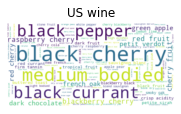

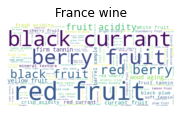

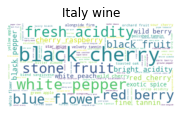

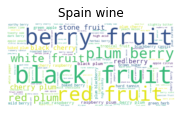

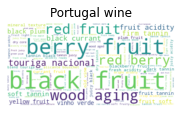

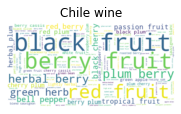

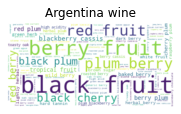

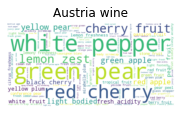

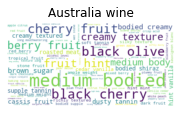

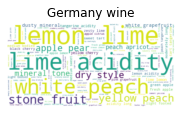

In [63]:
for country in pop_country:
    
    country_des = des[des['country']==country]['desc']
    create_cloud(tfidf_score(country_des))

/home/mecon/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['sauvignon'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


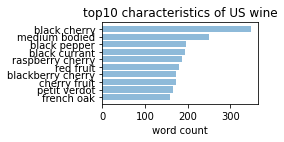

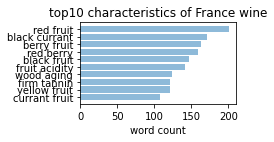

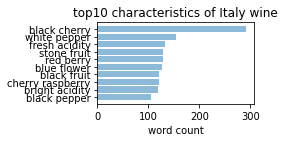

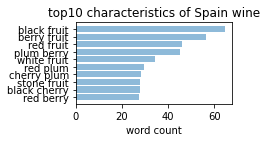

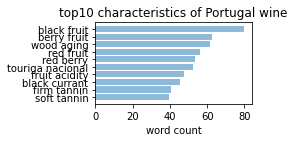

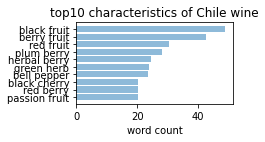

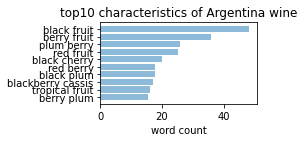

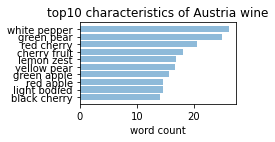

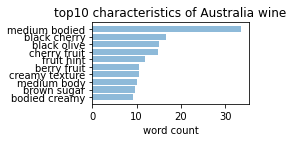

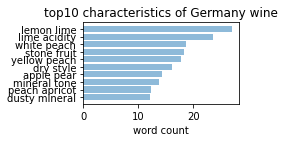

In [29]:
for country in pop_country:
    
    country_des = des[des['country']==country]['desc']
                      
    idf = tfidf_score(country_des)

    name = list(idf['words'][:10])
    score = list(idf['tf-idf'][:10])

    objects = name
    y_pos = np.arange(len(objects))[::-1]

    plt.figure(figsize=(2.8,1.5))
    plt.barh(y_pos, score, align='center', alpha=0.5)
    plt.yticks(y_pos, objects)

    plt.xlabel('word count')
    plt.title('top10 characteristics of '+str(country)+ ' wine')
    plt.savefig('bigram_'+str(country)+'.png',bbox_inches='tight',dpi=200)
    plt.show()



## Prediction of the country


### Logistc regression and Count vectorizer

In [6]:

from sklearn.model_selection import train_test_split

X = des['desc']
y = des['country']


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1,train_size=0.4, random_state=2)

print(X.size, X_train.size,X_test.size)

124584 49833 12459


In [7]:
# 
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report

pipe=Pipeline([("vectorize",CountVectorizer(binary=False,ngram_range=(1,1))),
                ("LR",LogisticRegression(penalty="l2",max_iter=1000,multi_class='multinomial'))])

pipe.fit(X_train,y_train)

res=pipe.predict(X_test)
print(confusion_matrix(y_test,res))
print(classification_report(y_test,res))

[[ 187    0    0   73    2    0    4    0   97   22]
 [   1  141    1    4   21    2    7    0    2   72]
 [   0    1  203    1   99    1    4    8    1   27]
 [  74    1    1  256    2    0    6    0   93   30]
 [   2   10   30    3 1988    1   10   65    3  115]
 [   0    8    1    1   10  134    1    0    0   77]
 [   3    1    1    2   19    2 1811    1    3   71]
 [   0    0    3    0  246    1    1  311    1   16]
 [  68    1    1   76   10    0    2    0  466   37]
 [   6   17    7    8   75   43   34    4   12 5196]]
              precision    recall  f1-score   support

   Argentina       0.55      0.49      0.52       385
   Australia       0.78      0.56      0.65       251
     Austria       0.82      0.59      0.68       345
       Chile       0.60      0.55      0.58       463
      France       0.80      0.89      0.85      2227
     Germany       0.73      0.58      0.64       232
       Italy       0.96      0.95      0.95      1914
    Portugal       0.80      0.54   

In [8]:
# 
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report

pipe=Pipeline([("vectorize",CountVectorizer(binary=False,ngram_range=(2,2))),
                ("LR",LogisticRegression(penalty="l2",max_iter=1000,multi_class='multinomial'))])

pipe.fit(X_train,y_train)

res=pipe.predict(X_test)
print(confusion_matrix(y_test,res))
print(classification_report(y_test,res))

[[  84    0    0   56    5    0    7    0  128  105]
 [   0   58    3    1   29    1   10    0    2  147]
 [   0    0  124    0  132    0    3    8    0   78]
 [  40    0    1  161   10    0    9    0  118  124]
 [   0    8   24    1 1857    0   15   83    2  237]
 [   0    5    1    0   17   85    1    0    1  122]
 [   1    0    0    1   18    0 1710    0    4  180]
 [   0    0    1    0  310    0    1  228    0   39]
 [  59    0    1   60    8    0   12    0  349  172]
 [   3    3    1    6   60   20   31    3    6 5269]]
              precision    recall  f1-score   support

   Argentina       0.45      0.22      0.29       385
   Australia       0.78      0.23      0.36       251
     Austria       0.79      0.36      0.50       345
       Chile       0.56      0.35      0.43       463
      France       0.76      0.83      0.79      2227
     Germany       0.80      0.37      0.50       232
       Italy       0.95      0.89      0.92      1914
    Portugal       0.71      0.39   

In [ ]:
###### 1gram
## countvectorize( without ngram) = 0.86
######2 gram
0.80 

### MLP classifier

In [125]:
from sklearn.neural_network import MLPClassifier

pipe=Pipeline([("vectorize",CountVectorizer(binary=False,ngram_range=(1,1))),("MLP",MLPClassifier(hidden_layer_sizes=(300,300,300),max_iter=8))])
pipe.fit(X_train,y_train)

res=pipe.predict(X_test)
print(confusion_matrix(y_test,res))
print(classification_report(y_test,res))`


/home/mecon/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  warnings.warn(


[[  36    0    0   12    0    0    0    0   15    4]
 [   2   20    0    1   11    0    2    0    1    8]
 [   0    0   50    0   19    0    0    1    0    5]
 [  10    0    0   50    0    0    0    0   10    7]
 [   0    2   20    2  348    0    2   55    2   11]
 [   0    1    1    0    2   29    2    0    0   14]
 [   1    0    0    0    0    0  381    1    0   10]
 [   0    0    1    0   25    0    0   94    1    1]
 [  19    0    0   15    1    0    1    0   85    3]
 [   3    4    4    4   14    6   10    0    4 1049]]
              precision    recall  f1-score   support

   Argentina       0.51      0.54      0.52        67
   Australia       0.74      0.44      0.56        45
     Austria       0.66      0.67      0.66        75
       Chile       0.60      0.65      0.62        77
      France       0.83      0.79      0.81       442
     Germany       0.83      0.59      0.69        49
       Italy       0.96      0.97      0.96       393
    Portugal       0.62      0.77   

In [9]:
from sklearn.neural_network import MLPClassifier

pipe=Pipeline([("vectorize",CountVectorizer(binary=False,ngram_range=(2,2))),("MLP",MLPClassifier(hidden_layer_sizes=(300,300,300),max_iter=8))])
pipe.fit(X_train,y_train)

res=pipe.predict(X_test)
print(confusion_matrix(y_test,res))
print(classification_report(y_test,res))


/home/mecon/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[[  37    0    0    0    3    0    1    0  317   27]
 [   0   78    4    0   21    3    7    0   10  128]
 [   0    0  157    0  126    0    6   12    2   42]
 [  11    0    0   14    6    1    1    0  377   53]
 [   0   19   48    0 1820    1    8  156   12  163]
 [   0    6    5    0    7  132    2    0    2   78]
 [   0    0    2    0   13    1 1786    0   18   94]
 [   0    0    1    0  264    0    1  295    0   18]
 [  12    0    1    2    0    1    2    0  587   56]
 [   2    6    1    0   55   65   28    4   49 5192]]
              precision    recall  f1-score   support

   Argentina       0.60      0.10      0.17       385
   Australia       0.72      0.31      0.43       251
     Austria       0.72      0.46      0.56       345
       Chile       0.88      0.03      0.06       463
      France       0.79      0.82      0.80      2227
     Germany       0.65      0.57      0.61       232
       Italy       0.97      0.93      0.95      1914
    Portugal       0.63      0.51   

## NB model for CountVecterizer, TFIDF


### Unigram and bigram

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

X = des['desc']
y = des['country']


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,train_size=0.6, random_state=2)

print(X.size, X_train.size,X_test.size)

124584 74750 24917


In [35]:
# TODO: Write code here to train and evaluate a Multinomial Naive Bayes classifier

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report

         
# vectorize the speeches in the training data + Fit in Navie Bayes model 

pipe = Pipeline([('vectorizer',TfidfVectorizer(binary=False) ), ('NaiveBayes', MultinomialNB()) ])
pipe.fit(X_train,y_train)

res=pipe.predict(X_test)
print(confusion_matrix(y_test,res))
print(classification_report(y_test,res))


[[   13     0     0     4     3     0     4     0   211   527]
 [    0     3     0     0     4     0     8     0     0   474]
 [    0     0    40     0   310     0     2     0     0   331]
 [    0     0     0    51     1     0     0     0   221   635]
 [    0     0     2     0  3719     0     4     0     0   723]
 [    0     0     0     0     1     5     0     0     0   440]
 [    0     0     0     0    14     0  3317     0     0   511]
 [    0     0     0     0   792     0     0   255     0   115]
 [    0     0     0     2     3     0     3     0   542   747]
 [    0     0     0     0    19     0     9     0     2 10850]]
              precision    recall  f1-score   support

   Argentina       1.00      0.02      0.03       762
   Australia       1.00      0.01      0.01       489
     Austria       0.95      0.06      0.11       683
       Chile       0.89      0.06      0.11       908
      France       0.76      0.84      0.80      4448
     Germany       1.00      0.01      0.02 

##### f1 score for unigram
Count 0.84
tfidf 0.75

In [ ]:
#### f1 score for bigram
Count 0.79
tfidf 0.69